# Chow tests for evaluating break points in piecewise functions

First off we can either write out an entire Chow test or we can use a package from github.
Because this is 5 minutes of Python it's easier for me to clone this github package
and use it for a quick and dirty analysis


In [ ]:
#this pip installs the cloned package
! pip install git+https://github.com/jtloong/chow-test.git

In [1]:
import chow_test #import the chow test package and numpy/plotting packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

To see how the Chow test works, let's start by making two sets of linear data with different slopes.

In [2]:
line0x = np.linspace(0,10,20) #first line x values
line0y = ((line0x*1)/20)+1.25 #first line y values

line1x = np.linspace(11,20,20) #second line x values
line1y = ((line1x*1)/40)+1.48 #second line y values


Then plot them up to see what the data looks like. We have a break in slope at x=11

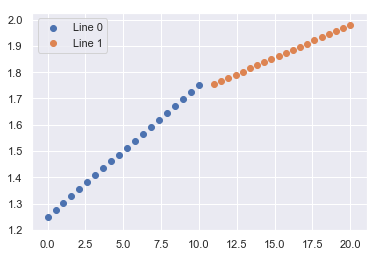

In [3]:
plt.scatter(line0x, line0y, label='Line 0')
plt.scatter(line1x, line1y, label='Line 1')
plt.legend()

Next let's combine them into two variables (x and y)

In [4]:
x = np.append(line0x, line1x)
y = np.append(line0y, line1y)

We are going to iterate through the entire numpy array assuming that every point could be a potential breakpoint. To do that we select a point and then split the data so that everything to the left is one group, and everything to the right is the other group. We calculate the Chow test for both groups and get a F-value for each point in the data. We take those values and put them into a list that we can visualize with later on. Documentation for the Chow test package is found at https://github.com/jtloong/chow_test

In [5]:
fvalues = [] #empty list for f-values
for i in enumerate(x): #running through every point assuming it's the break point between the two datasets
    y1 = y[0:i[0]] #first group y values
    x1 = x[0:i[0]] #first group x values
    y2 = y[i[0]:] #second group y values
    x2 = x[i[0]:] #second group x values
    fvalues.append(chow_test.f_value(y1, x1, y2, x2)) #add fvalues to the list

Now lets visualize the results of the Chow test calculation for every point. We get some strange edge effects when groups have less than 3 values in them, so we will fill the edges with zeros. We expected to see a high F-value at x=11 where our change in slope is located and indeed we do see that. You can start adding noise to the data and see how it changes the ability of the test to find the break in slope.

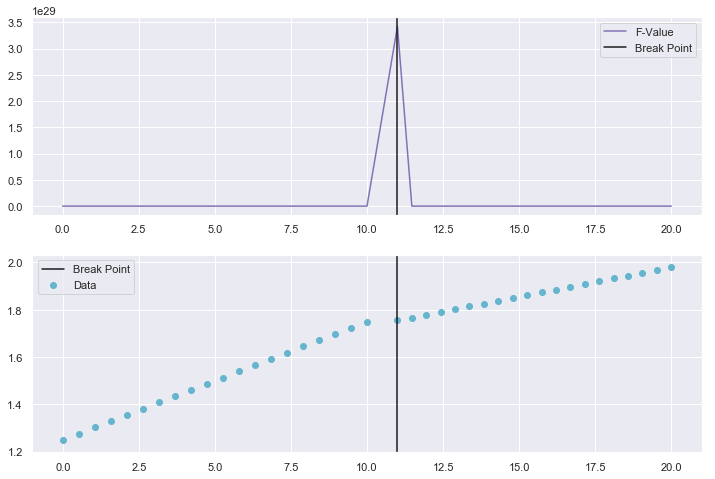

In [6]:
fig = plt.figure(figsize = (12, 8)) #create our figure
ax = fig.add_subplot(211) #first subplot with the f-values 
ax.plot(x, np.pad(np.squeeze(fvalues[3:-2]),(3,2), mode='constant'), label = 'F-Value', c='m') #clean up f values and plot them
ax.axvline(x=11, c='k', label='Break Point')

ax1 = fig.add_subplot(212) #second subplot with the data
ax1.scatter(x, y, c='c', label='Data' )
ax1.axvline(x=11, c='k', label='Break Point')

ax.legend()
ax1.legend()

This notebook is licensed as CC-BY, use and share to your hearts content.